# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data') # fish_csv_data 파일에서 데이터 불러오기

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() # input data
fish_target = fish['Species'].to_numpy() # y

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) # train, test 분할

In [4]:
from sklearn.preprocessing import StandardScaler # 평균 0, 표준편차 1로 정규화

ss = StandardScaler()
ss.fit(train_input) # fitting
train_scaled = ss.transform(train_input) # train data transform
test_scaled = ss.transform(test_input)  # test data transform

In [5]:
from sklearn.linear_model import SGDClassifier # SGC 분류기 호출

In [6]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 객체를 생성하면서, loss_fn을 "log" : 로지스틱 손실 함수로 설정
# 즉 Logistic regression을 사용했으며 훈련하면서 가중치 업데이트 방식을 SGD사용
sc.fit(train_scaled, train_target) # 모델 훈련

print(sc.score(train_scaled, train_target)) # score 출력
print(sc.score(test_scaled, test_target)) # score 출력
# 실험 결과 UnderFitting

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
sc.partial_fit(train_scaled, train_target) # Partial_fit 메서드를 통해 추가로 더 훈련; 모델을 이어서 훈련시에 사용, 호출할 때마다 1epoch씩 이어서 훈련함(객체를 재생성하지 않음)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 그럼에도 불구하고 underfitting

0.8067226890756303
0.8


## 에포크와 과대/과소적합

In [12]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42) # max_iter를 안줬으면 default 값인 1000으로 작동함

train_score = [] # 훈련 세트 접수를 저장할 리스트 생성
test_score = []  # 테스트 세트 점수를 저장할 리스트 생성

classes = np.unique(train_target) # train_target에 있는 7개 생선의 목록 생성
print('Class',classes)

Class ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
for _ in range(0, 300): # 300 epoch
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target)) # epoch당 훈련 세트 접수를 train_score 리스트에 추가
    test_score.append(sc.score(test_scaled, test_target))    # epoch 당 테스트 세트 접수를 test_Score 리스트에 추가

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


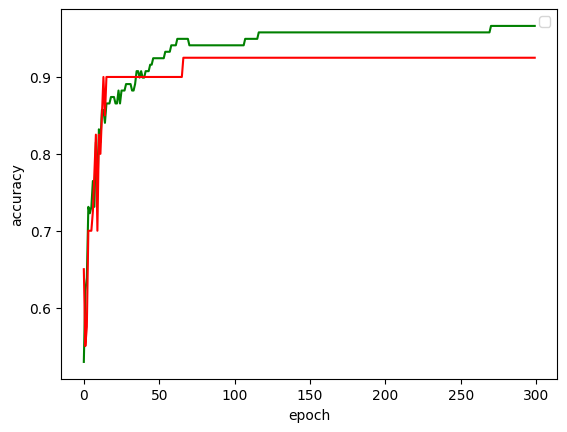

In [16]:
import matplotlib.pyplot as plt

plt.plot(train_score,color='green')
plt.plot(test_score,color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# 100번째 에폭 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음
# 에포크 초기에는 과소 적합되어 훈련세트와 테스트 세트의 점수가 낮음
# 이 모델의 경우 백번째 에포크가 적절한 반복횟수

In [17]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42) # tol = tolerance : NONE로 지정하여, 자동으로 멈추지 않음(default=1e-5)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [18]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # hinge loss는 SVM을 위한 loss_fn >> 이 값을 사용하면, SVM방식으로 분류
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
